# Training model

In [1]:
from snownlp import sentiment
sentiment.train('neg.txt', 'pos.txt')
sentiment.save("sentiment.marshal")

# Testing model

In [4]:
import pandas as pd
data_test = pd.read_csv("test.csv")
data_test.head()

,Opinion,ip_locations,Reviews
0,已经阳十四天了，咳嗽到三点还睡不着，就我这状态还考什么研啊……肖四只背了一半，英语作文模板没...,广州,-1
1,希望能扛过新冠，疫情放开对我太不友好了戚哥都无法照顾我了想要我家戚哥,中山,-1
2,其实每次都想说点什么，但是又觉得自己专业糊弄的不行，说不准确就不敢说…但是其实真的没法有序放...,海口,-1
3,帅帅高烧后的第一个12h在担忧中度过！疫情放开后，对我来说最大的煎熬是心理…心脏和肺部有基础...,杭州,1
4,好痛呀，从天灵盖痛到脚指头，从天灵盖冷到脚指头，头晕晕的，肯定是发烧了。真是，疫情三年都没有...,深圳,-1


In [3]:
from snownlp import SnowNLP
s = []
for c in data_test['Opinion']:
    score = SnowNLP(c).sentiments
    if score>=0.5:
        s.append(1)
    else:
        s.append(-1)
data_test['pre'] = s

In [4]:
data_test.head()

,Opinion,ip_locations,Reviews,pre
0,已经阳十四天了，咳嗽到三点还睡不着，就我这状态还考什么研啊……肖四只背了一半，英语作文模板没...,广州,-1,-1
1,希望能扛过新冠，疫情放开对我太不友好了戚哥都无法照顾我了想要我家戚哥,中山,-1,-1
2,其实每次都想说点什么，但是又觉得自己专业糊弄的不行，说不准确就不敢说…但是其实真的没法有序放...,海口,-1,-1
3,帅帅高烧后的第一个12h在担忧中度过！疫情放开后，对我来说最大的煎熬是心理…心脏和肺部有基础...,杭州,1,1
4,好痛呀，从天灵盖痛到脚指头，从天灵盖冷到脚指头，头晕晕的，肯定是发烧了。真是，疫情三年都没有...,深圳,-1,1


In [5]:
count = 0
for i in range(407):
    if int(data_test['Reviews'][i]) ==int(data_test['pre'][i]):
        count += 1
count

326

In [6]:
count/len(data_test)

0.800982800982801

# Analysis of data

In [5]:
df1 = pd.read_csv("Unblocked.csv")
df1.head()

,id,bid,user_id,用户昵称,微博正文,头条文章url,发布位置,艾特用户,话题,转发数,评论数,点赞数,发布时间,发布工具,微博图片url,微博视频url,retweet_id
0,4.848560e+15,Mkn8Vh9Zm,6123093495,coueqpd,疫情放开之后我的快递等得是越来越痛苦了,NaN,NaN,NaN,NaN,0,0,0,2022/12/20 0:58,荣耀50 Pro 5G,NaN,NaN,NaN
1,4.848550e+15,Mkn8bvcoH,1842890712,Ava碎碎念,还是有疫情的惯性，觉得两地通勤是那么困难。19年前苏沪来回就像上学回家一样方便，想去就出发了...,NaN,NaN,NaN,NaN,0,1,0,2022/12/20 0:56,NaN,NaN,NaN,NaN
2,4.848550e+15,Mkn7704SC,6292525350,爱吃仙人粥啊,好想出去玩啊疫情放开了出去吧出去吧,NaN,NaN,NaN,NaN,0,0,0,2022/12/20 0:54,iPhone客户端,NaN,NaN,NaN
3,4.848550e+15,Mkn6WEl0t,5690522195,吃草莓不吃草莓味的火星花,可能疫情这几年国家保护得太好了，一放开，病了真是要了半条命,NaN,NaN,NaN,NaN,0,0,0,2022/12/20 0:53,iPhone客户端,NaN,NaN,NaN
4,4.848550e+15,Mkn6z4vyA,5810239380,小开和馒,重看想见你发现李子维去监狱探望莫俊杰的时候大家都是带着口罩的恍惚了一下想说那时候也没有疫情啊...,NaN,NaN,NaN,NaN,0,0,0,2022/12/20 0:52,荣耀30 5G,NaN,NaN,NaN


In [8]:
s = []
for c in df1['微博正文']:
    score = SnowNLP(c).sentiments
    s.append(score)

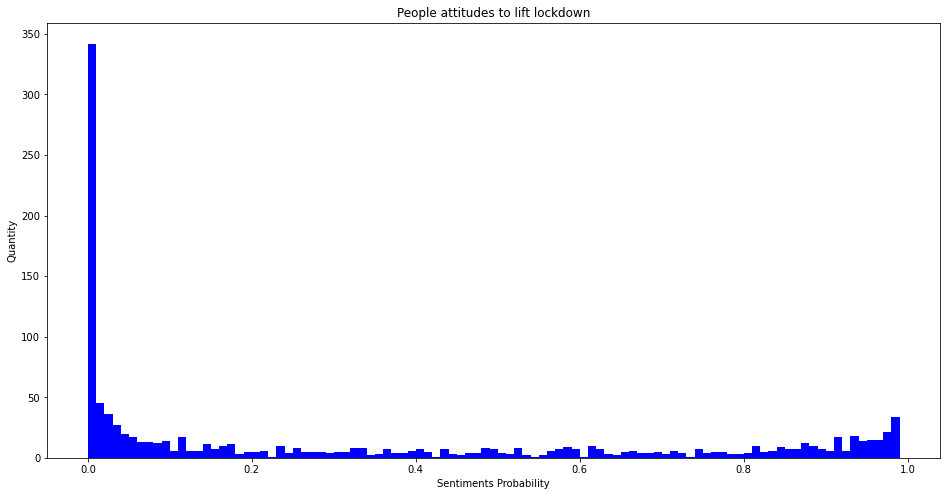

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(16,8))
plt.hist(s, bins = np.arange(0, 1, 0.01), facecolor = 'b')
plt.xlabel('Sentiments Probability')
plt.ylabel('Quantity')
plt.title('People attitudes to lift lockdown')
plt.show()

In [12]:
df2 = pd.read_csv("block.csv")
df2.head()

,id,bid,user_id,用户昵称,微博正文,头条文章url,发布位置,艾特用户,话题,转发数,评论数,点赞数,发布时间,发布工具,微博图片url,微博视频url,retweet_id
0,4.840750e+15,Mh645znUv,5833343304,星话大白,今天文章，我主要从日本近期疫情数据，还有日本的超额死亡数据，来做一个论证分析，看奥密克戎对整...,NaN,NaN,NaN,微博新知博主,157,128,787,2022/11/28 11:59,微博 weibo.com,NaN,NaN,NaN
1,4.840750e+15,Mh640fhwh,1306014463,寒珠,看到封控爱好者有个观点，支持全城静默清零的人，比大部分人经济能力都强……恰恰相反，我关注的公...,NaN,NaN,NaN,NaN,10,20,137,2022/11/28 11:58,NaN,['https://wx4.sinaimg.cn/large/4dd832ffly1h8kt...,NaN,NaN
2,4.840750e+15,Mh63M4mOR,7602442591,好一只猪609,要求放开疫情防控的家里是没有老人吗,NaN,NaN,NaN,NaN,0,0,0,2022/11/28 11:58,OPPO智能手机,NaN,NaN,NaN
3,4.840750e+15,Mh63H0KYW,6981450665,黄小姐聊财经,今天市场多少有一些修复，但是偏谨慎吧。因为后续大家不知道还会发生什么突然利空，所以谨慎一些没...,NaN,NaN,NaN,NaN,1,0,175,2022/11/28 11:58,新版微博 weibo.com,NaN,NaN,NaN
4,4.840750e+15,Mh63BpVKY,6343705644,紫禁说事,未来是一定会全面开放，或者朝着放宽政策去的，为什么呢？第一，国家这几年为了新冠，是真的没什么...,NaN,NaN,NaN,NaN,4,1,9,2022/11/28 11:57,nova 8 SE 活力版,NaN,NaN,NaN


In [13]:
s = []
for c in df2['微博正文']:
    score = SnowNLP(c).sentiments
    s.append(score)

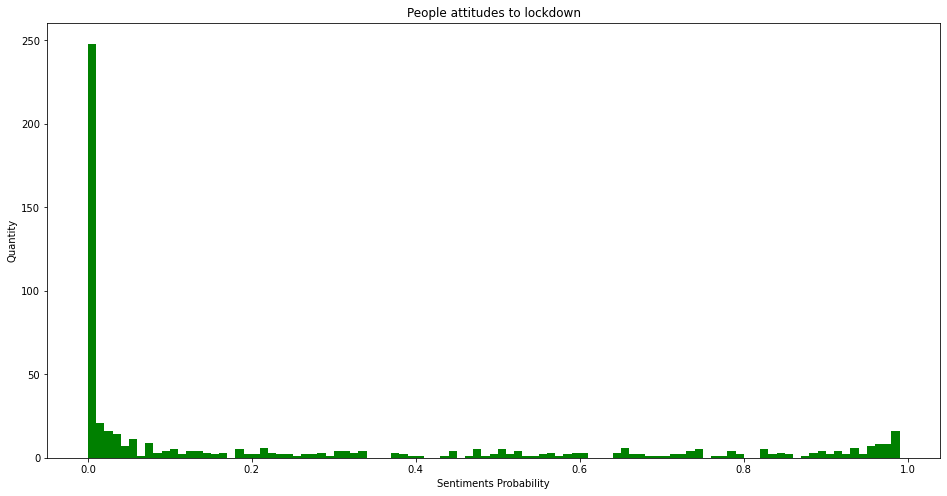

In [14]:
plt.figure(figsize=(16,8))
plt.hist(s, bins = np.arange(0, 1, 0.01), facecolor = 'g')
plt.xlabel('Sentiments Probability')
plt.ylabel('Quantity')
plt.title('People attitudes to lockdown')
plt.show()